# 1- Prepare Problem

### a. Load libraries

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### b. Load Dataset

In [ ]:
train  = pd.read_csv('/content/gdrive/My Drive/sample data/train_cab.csv',dtype={'fare_amount':np.float64},na_values={'fare_amount':'430-'})
test = pd.read_csv('/content/gdrive/My Drive/sample data/test.csv')


In [ ]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [ ]:
data = [train, test]
for i in data:
    i['pickup_datetime']= pd.to_datetime(i['pickup_datetime'], errors='coerce')

In [ ]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        16042 non-null  float64            
 1   pickup_datetime    16066 non-null  datetime64[ns, UTC]
 2   pickup_longitude   16067 non-null  float64            
 3   pickup_latitude    16067 non-null  float64            
 4   dropoff_longitude  16067 non-null  float64            
 5   dropoff_latitude   16067 non-null  float64            
 6   passenger_count    16012 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 878.8 KB


# 2. Summarize Data

### a. Descriptive Statistics

In [ ]:
train.describe().round(2)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16042.00,16067.00,16067.00,16067.00,16067.00,16012.00
mean,15.02,-72.46,39.91,-72.46,39.90,2.63
std,430.46,10.58,6.83,10.58,6.19,60.84
min,-3.00,-74.44,-74.01,-74.43,-74.01,0.00
25%,6.00,-73.99,40.73,-73.99,40.73,1.00
50%,8.50,-73.98,40.75,-73.98,40.75,1.00
75%,12.50,-73.97,40.77,-73.96,40.77,2.00
max,54343.00,40.77,401.08,40.80,41.37,5345.00


# EDA
***
    -  we will convert passenger_count into a categorical variable because passenger_count is not a continuous variable.
    -  passenger_count cannot take continous values. and also they are limited in number if its a cab.
***

In [ ]:
cat_var=['passenger_count']
num_var=['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']

### Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# setting up the sns for plots
sns.set(style='darkgrid',palette='Set1')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

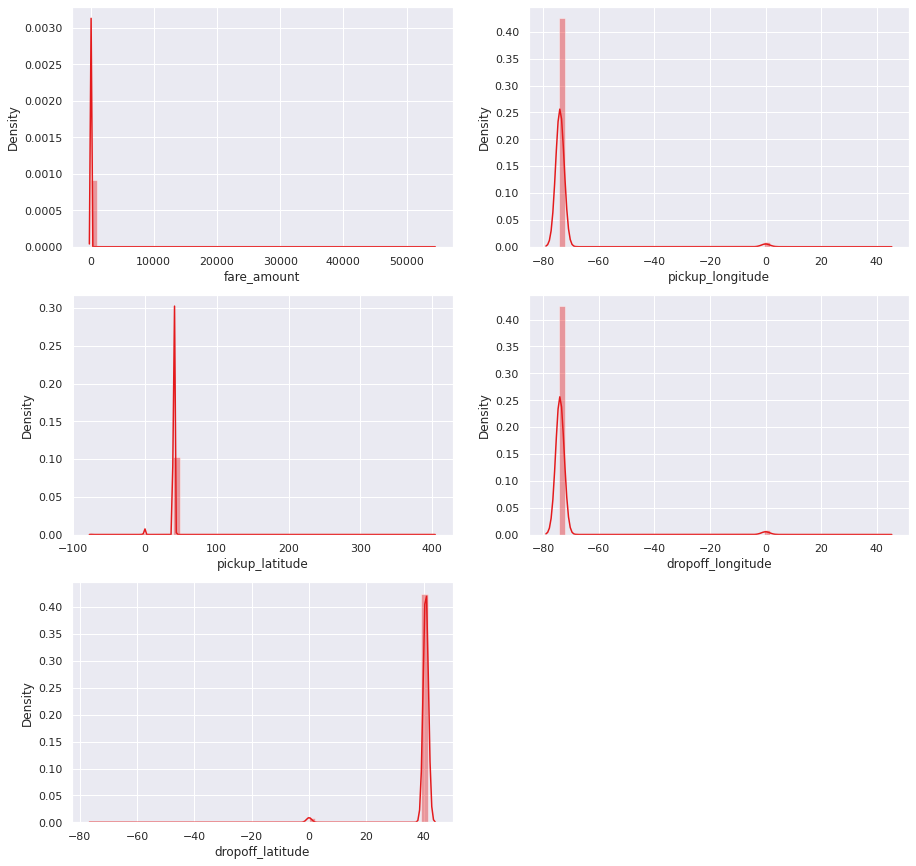

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(321)
_ = sns.distplot(train['fare_amount'],bins=50)
plt.subplot(322)
_ = sns.distplot(train['pickup_longitude'],bins=50)
plt.subplot(323)
_ = sns.distplot(train['pickup_latitude'],bins=50)
plt.subplot(324)
_ = sns.distplot(train['dropoff_longitude'],bins=50)
plt.subplot(325)
_ = sns.distplot(train['dropoff_latitude'],bins=50)
# plt.savefig('hist.png')
plt.show()

# 3. Preparing Data - Preprocessing

### a. Data Cleaning

#### Removing values which are not within desired range(outlier) depending upon basic understanding of dataset.
***
    1."Fare amount" has a negative value, which doesn't make sense. A price amount cannot be -ve and also cannot be 0. So we will remove these fields.
***

In [ ]:
sum(train['fare_amount']<1)

5

In [ ]:
train[train['fare_amount']<1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,-2.90,2010-03-09 23:37:10+00:00,-73.789450,40.643498,-73.788665,40.641952,1.0
2486,-2.50,2015-03-22 05:14:27+00:00,-74.000031,40.720631,-73.999809,40.720539,1.0
2780,0.01,2015-05-01 15:38:41+00:00,-73.939041,40.713963,-73.941673,40.713997,1.0
10002,0.00,2010-02-15 14:26:01+00:00,-73.987115,40.738808,-74.005911,40.713960,1.0
13032,-3.00,2013-08-30 08:57:10+00:00,-73.995062,40.740755,-73.995885,40.741357,4.0


In [ ]:
train = train.drop(train[train['fare_amount']<1].index, axis=0)

In [ ]:
sum(train['fare_amount']<1)

0

In [ ]:
train[train['fare_amount']<1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


***
    2.Passenger_count variable
***

In [ ]:
sum(train['passenger_count']<1)

58

In [ ]:
sum(train['passenger_count']>6)

20

In [ ]:
train = train.drop(train[train['passenger_count']<1].index, axis=0)

In [ ]:
train = train.drop(train[train['passenger_count']>6].index, axis=0)

In [ ]:
sum(train['passenger_count']<1)

0

In [ ]:
sum(train['passenger_count']>6)

0

In [ ]:
train['passenger_count'].value_counts()

1.0    11255
2.0     2322
5.0     1045
3.0      676
4.0      328
6.0      302
1.3        1
Name: passenger_count, dtype: int64

In [ ]:
train = train.drop(train[train['passenger_count']==1.3].index, axis=0)

In [ ]:
train['passenger_count'].value_counts()

1.0    11255
2.0     2322
5.0     1045
3.0      676
4.0      328
6.0      302
Name: passenger_count, dtype: int64

***
    3.Latitudes range from -90 to 90.Longitudes range from -180 to 180. Removing which does not satisfy these ranges
***

In [ ]:
print(f"pickup_longitude above 180= {sum(train['pickup_longitude']>180)}")
print(f"pickup_longitude below -180= {sum(train['pickup_longitude']<-180)}")
print(f"pickup_latitude above 90={sum(train['pickup_latitude']>90)}")
print(f"pickup_latitude above -90={sum(train['pickup_latitude']<-90)}")

print(f"dropoff_longitude above 180= {sum(train['dropoff_longitude']>180)}")
print(f"dropoff_longitude below -180= {sum(train['dropoff_longitude']<-180)}")
print(f"dropoff_latitude above 90={sum(train['dropoff_latitude']>90)}")
print(f"dropoff_latitude above -90={sum(train['dropoff_latitude']<-90)}")

pickup_longitude above 180= 0
pickup_longitude below -180= 0
pickup_latitude above 90=1
pickup_latitude above -90=0
dropoff_longitude above 180= 0
dropoff_longitude below -180= 0
dropoff_latitude above 90=0
dropoff_latitude above -90=0


In [ ]:
train = train.drop(train[train['pickup_latitude']>90].index, axis=0)

In [ ]:
print(f"pickup_latitude above 90={sum(train['pickup_latitude']>90)}")

pickup_latitude above 90=0


***
There's only one outlier which is in variable pickup_latitude.So we will remove it with nan.
Also we will see if there are any values equal to 0.
***

In [ ]:
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    print(f"{i} equal to 0 = {sum(train[i]==0)}")

pickup_longitude equal to 0 = 311
pickup_latitude equal to 0 = 311
dropoff_longitude equal to 0 = 312
dropoff_latitude equal to 0 = 310


In [ ]:
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    train = train.drop(train[train[i]==0].index, axis=0)

In [ ]:
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    print(f"{i} equal to 0 = {sum(train[i]==0)}")

pickup_longitude equal to 0 = 0
pickup_latitude equal to 0 = 0
dropoff_longitude equal to 0 = 0
dropoff_latitude equal to 0 = 0


In [ ]:
train.shape

(15660, 7)

In [ ]:
df=train.copy()

### Missing Value Analysis

In [ ]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(train.isnull().sum())

# #Reset index
missing_val = missing_val.reset_index()
missing_val

,index,0
0,fare_amount,22
1,pickup_datetime,1
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55


***
    As we can see there are some missing values in the data.
    Also pickup_datetime variable has 1 missing value.
    We will impute missing values for fare_amount,passenger_count variables except pickup_datetime.
    And we will drop that 1 row which has missing value in pickup_datetime.
***

In [ ]:
# Rename Variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(train))*100
missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

,Variables,Missing_percentage
0,passenger_count,0.351213
1,fare_amount,0.140485
2,pickup_datetime,0.006386
3,pickup_longitude,0.000000
4,pickup_latitude,0.000000
5,dropoff_longitude,0.000000
6,dropoff_latitude,0.000000


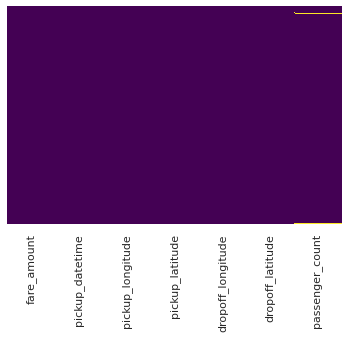

In [ ]:
# plt.figure(figsize=(10,5))
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')
plt.show()

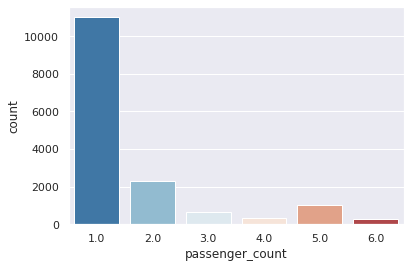

In [ ]:
sns.countplot(x='passenger_count', data=train, palette='RdBu_r' )

# Selecting Bounding Map

In [ ]:
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])

In [ ]:
BB = (-74.5, -72.8, 40.5, 41.8)

In [ ]:
nyc_map = plt.imread('/content/gdrive/My Drive/sample data/nyc_-74.5_-72.8_40.5_41.8.png')

In [ ]:
train = train[select_within_boundingbox(train, BB)]

In [ ]:
len(train)

15639

# Function for plot data on NYC map

In [ ]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1,2,figsize=(16,10))
    axs[0].scatter(df["pickup_longitude"], df["pickup_latitude"], alpha=alpha, color='r')
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup_locations')
    axs[0].imshow(nyc_map, extent=BB)
    
    axs[1].scatter(df["dropoff_longitude"], df["dropoff_latitude"], alpha=alpha, color='b')
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('dropoff_locations')
    axs[1].imshow(nyc_map, extent=BB)

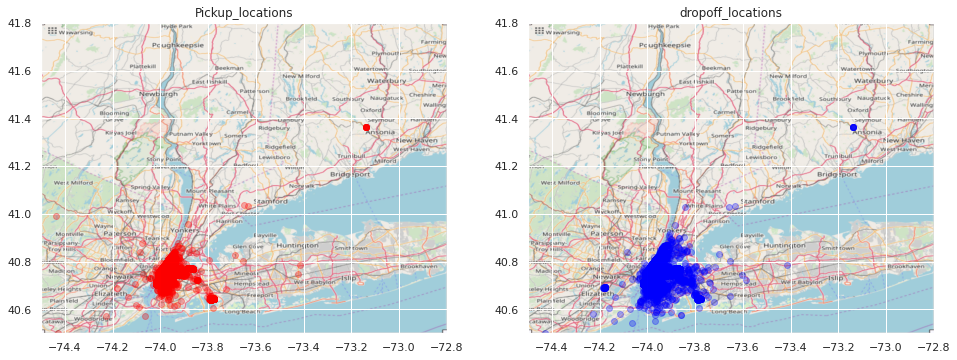

In [ ]:
# Plotting train Data on map
plot_on_map(train, BB, nyc_map, s=1, alpha=0.3)

In [ ]:
# train['passenger_count']=train['passenger_count'].astype('int')

In [ ]:
train['passenger_count'].unique()

array([ 1.,  2.,  3., nan,  6.,  5.,  4.])

In [ ]:
sum(train['passenger_count'].isnull())

55

In [ ]:
columns=['fare_amount', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [ ]:
# we will separate pickup_datetime into a different dataframe and then merge with train in feature engineering step.
pickup_datetime=pd.DataFrame(train['pickup_datetime'])

In [ ]:
# Imputing with missing values using KNN
# Use 19 nearest rows which have a feature to fill in each row's missing features
#for Imputation
from fancyimpute import KNN
train = pd.DataFrame(KNN(k = 19).fit_transform(train.drop('pickup_datetime',axis=1)),columns=columns, index=train.index)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Imputing row 1/15639 with 0 missing, elapsed time: 42.432
Imputing row 101/15639 with 0 missing, elapsed time: 42.433
Imputing row 201/15639 with 0 missing, elapsed time: 42.435
Imputing row 301/15639 with 0 missing, elapsed time: 42.435
Imputing row 401/15639 with 0 missing, elapsed time: 42.436
Imputing row 501/15639 with 0 missing, elapsed time: 42.437
Imputing row 601/15639 with 0 missing, elapsed time: 42.438
Imputing row 701/15639 with 0 missing, elapsed time: 42.438
Imputing row 801/15639 with 0 missing, elapsed time: 42.439
Imputing row 901/15639 with 0 missing, elapsed time: 42.440
Imputing row 1001/15639 with 0 missing, elapsed time: 42.440
Imputing row 1101/15639 with 0 missing, elapsed time: 42.441
Imputing row 1201/15639 with 0 missing, elapsed time: 42.441
Imputing row 1301/15639 with 0 missing, elapsed time: 42.442
Imputing row 1401/15639 with 0 missing, elapsed time: 42.442
Imputing row 1501/15639 with 0 missing, elapsed time: 42.443
Imputing row 1601/15639 with 0 missi

In [ ]:
train.std()

fare_amount          435.968152
pickup_longitude       0.041492
pickup_latitude        0.031499
dropoff_longitude      0.039328
dropoff_latitude       0.033442
passenger_count        1.264044
dtype: float64

In [ ]:
train['passenger_count'].head()

0    1.0
1    1.0
2    2.0
3    1.0
4    1.0
Name: passenger_count, dtype: float64

In [ ]:
train['passenger_count']=train['passenger_count'].astype('int')

In [ ]:
train['passenger_count'].unique()

array([1, 2, 3, 6, 5, 4])

In [ ]:
pickup_datetime.head()

,pickup_datetime
0,2009-06-15 17:26:21+00:00
1,2010-01-05 16:52:16+00:00
2,2011-08-18 00:35:00+00:00
3,2012-04-21 04:30:42+00:00
4,2010-03-09 07:51:00+00:00


In [ ]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(pickup_datetime.isnull().sum())
#Reset index
missing_val = missing_val.reset_index()
missing_val

,index,0
0,pickup_datetime,1


In [ ]:
pickup_datetime.shape

(15639, 1)

In [ ]:
train.shape

(15639, 6)

In [ ]:
train['passenger_count'].describe()

count    15639.000000
mean         1.649082
std          1.264238
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [ ]:
train['passenger_count']=train['passenger_count'].round().astype('object').astype('category')

In [ ]:
train['passenger_count'].describe()

count     15639
unique        6
top           1
freq      11042
Name: passenger_count, dtype: int64

In [ ]:
train['passenger_count'].unique()

[1, 2, 3, 6, 5, 4]
Categories (6, int64): [1, 2, 3, 6, 5, 4]

In [ ]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,15639.000000,15639.000000,15639.000000,15639.000000,15639.000000
mean,15.115341,-73.974836,40.751366,-73.973849,40.751865
std,435.968152,0.041492,0.031499,0.039328,0.033442
min,1.140000,-74.438233,40.500046,-74.429332,40.500046
25%,6.000000,-73.992401,40.736620,-73.991372,40.736382
50%,8.500000,-73.982057,40.753389,-73.980570,40.754268
75%,12.500000,-73.968114,40.767811,-73.965396,40.768338
max,54343.000000,-73.137393,41.366138,-73.137393,41.366138


## Outlier Analysis using Boxplot
-  We Will do Outlier Analysis only on Fare_amount just for now and we will do outlier analysis after feature engineering laitudes and longitudes.
Univariate Boxplots: Boxplots for all Numerical Variables including target variable.

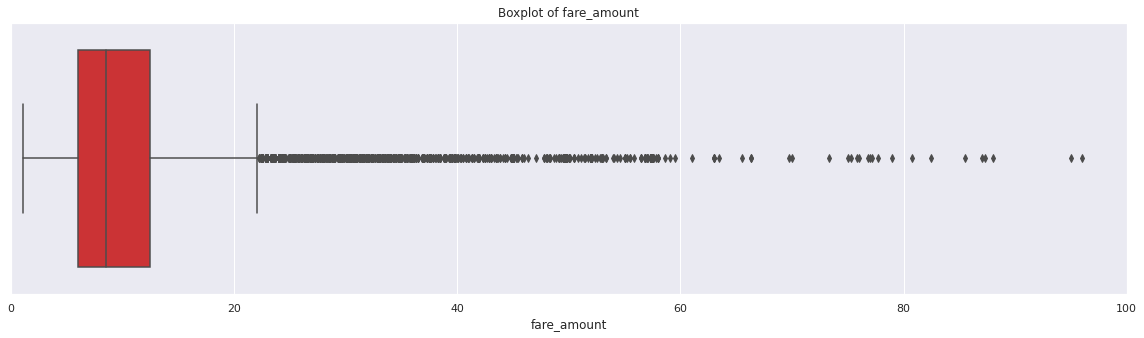

In [ ]:
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=train['fare_amount'],data=train,orient='h')
plt.title('Boxplot of fare_amount')
# plt.savefig('bp of fare_amount.png')
plt.show()

Bivariate Boxplots: Boxplot for Numerical Variable Vs Categorical Variable.

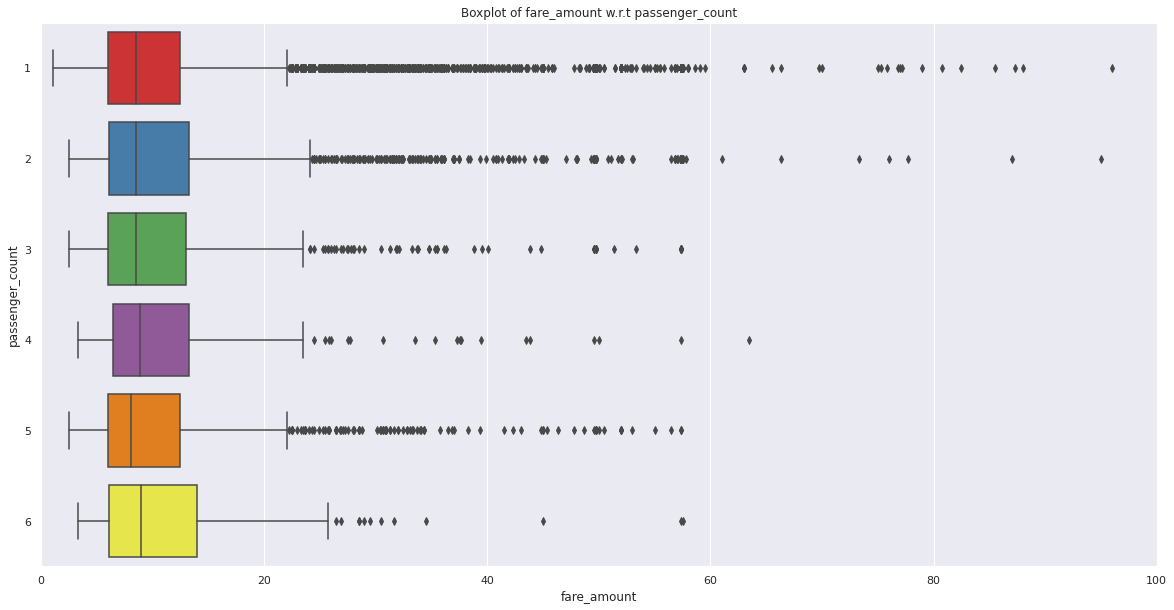

In [ ]:
plt.figure(figsize=(20,10))
plt.xlim(0,100)
_ = sns.boxplot(x=train['fare_amount'],y=train['passenger_count'],data=train,orient='h')
plt.title('Boxplot of fare_amount w.r.t passenger_count')
# plt.savefig('Boxplot of fare_amount w.r.t passenger_count.png')
plt.show()

In [ ]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,15639.000000,15639.000000,15639.000000,15639.000000,15639.000000
mean,15.115341,-73.974836,40.751366,-73.973849,40.751865
std,435.968152,0.041492,0.031499,0.039328,0.033442
min,1.140000,-74.438233,40.500046,-74.429332,40.500046
25%,6.000000,-73.992401,40.736620,-73.991372,40.736382
50%,8.500000,-73.982057,40.753389,-73.980570,40.754268
75%,12.500000,-73.968114,40.767811,-73.965396,40.768338
max,54343.000000,-73.137393,41.366138,-73.137393,41.366138


In [ ]:
train['passenger_count'].describe()

count     15639
unique        6
top           1
freq      11042
Name: passenger_count, dtype: int64

**Outlier Treatment**
  As we can see from the above Boxplots there are outliers in the train dataset Reconsider pickup_longitude,etc.

In [ ]:
def outlier_treatment(attr):
  ''' calculating outlier indices and replace with NA'''
  q75, q25 = np.percentile(train[attr], [75, 25])
  print(q75, q25)
  #calculate IQR
  iqr = q75-q25
  #calculate min, max frequency
  minimum = q25 - (iqr*1.5)
  maximum = q75 + (iqr*1.5)
  print(minimum,maximum)

  #Replace with NA
  train.loc[train[attr] < minimum,attr] = np.nan
  train.loc[train[attr] > maximum,attr] = np.nan

In [ ]:
outlier_treatment('fare_amount')

12.5 6.0
-3.75 22.25


In [ ]:
pd.DataFrame(train.isnull().sum())

,0
fare_amount,1357
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [ ]:
#Imputing with missing values using KNN
train = pd.DataFrame(KNN(k = 3).fit_transform(train), columns = train.columns, index=train.index)

Imputing row 1/15639 with 0 missing, elapsed time: 38.262
Imputing row 101/15639 with 0 missing, elapsed time: 38.264
Imputing row 201/15639 with 0 missing, elapsed time: 38.265
Imputing row 301/15639 with 1 missing, elapsed time: 38.266
Imputing row 401/15639 with 0 missing, elapsed time: 38.268
Imputing row 501/15639 with 0 missing, elapsed time: 38.270
Imputing row 601/15639 with 1 missing, elapsed time: 38.272
Imputing row 701/15639 with 0 missing, elapsed time: 38.274
Imputing row 801/15639 with 0 missing, elapsed time: 38.276
Imputing row 901/15639 with 0 missing, elapsed time: 38.277
Imputing row 1001/15639 with 0 missing, elapsed time: 38.278
Imputing row 1101/15639 with 1 missing, elapsed time: 38.280
Imputing row 1201/15639 with 0 missing, elapsed time: 38.281
Imputing row 1301/15639 with 0 missing, elapsed time: 38.282
Imputing row 1401/15639 with 0 missing, elapsed time: 38.284
Imputing row 1501/15639 with 0 missing, elapsed time: 38.285
Imputing row 1601/15639 with 0 missi

In [ ]:
pd.DataFrame(train.isnull().sum())

,0
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [ ]:
train['passenger_count'].describe()

count    15639.000000
mean         1.649082
std          1.264238
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [ ]:
train['passenger_count']=train['passenger_count'].astype('int').round().astype('object').astype('category')

In [ ]:
train['passenger_count'].describe()

count     15639
unique        6
top           1
freq      11042
Name: passenger_count, dtype: int64

In [ ]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,15639.000000,15639.000000,15639.000000,15639.000000,15639.000000
mean,9.405443,-73.974836,40.751366,-73.973849,40.751865
std,4.477990,0.041492,0.031499,0.039328,0.033442
min,1.140000,-74.438233,40.500046,-74.429332,40.500046
25%,6.000000,-73.992401,40.736620,-73.991372,40.736382
50%,8.200000,-73.982057,40.753389,-73.980570,40.754268
75%,11.797460,-73.968114,40.767811,-73.965396,40.768338
max,22.100000,-73.137393,41.366138,-73.137393,41.366138


In [ ]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
train.shape

(15639, 6)

## Feature Engineering
#### 1.Feature Engineering for timestamp variable
-  we will derive new features from pickup_datetime variable
-  new features will be year,month,day_of_week,hour

In [ ]:
# we will Join 2 Dataframes pickup_datetime and train
train = pd.merge(pickup_datetime,train,right_index=True,left_index=True)
train.head()

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21+00:00,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16+00:00,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00+00:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42+00:00,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00+00:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
train.shape

(15639, 7)

In [ ]:
train=train.reset_index(drop=True)

In [ ]:
train.head()

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21+00:00,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16+00:00,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00+00:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42+00:00,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00+00:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
pd.DataFrame(train.isna().sum())

,0
pickup_datetime,1
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [ ]:
train=train.dropna()

In [ ]:
pd.DataFrame(train.isna().sum())

,0
pickup_datetime,0
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [ ]:
train.head()

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21+00:00,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16+00:00,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00+00:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42+00:00,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00+00:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1


In [ ]:
data = [train, test]
for i in data:
  i['year'] = pd.DatetimeIndex(i['pickup_datetime']).year
  i['month'] = pd.DatetimeIndex(i['pickup_datetime']).month
  i['hour'] = pd.DatetimeIndex(i['pickup_datetime']).hour
  i['day_of_week'] = pd.DatetimeIndex(i['pickup_datetime']).dayofweek

In [ ]:
train['year'].head()

0    2009
1    2010
2    2011
3    2012
4    2010
Name: year, dtype: int64

In [ ]:
train['month'].head()

0    6
1    1
2    8
3    4
4    3
Name: month, dtype: int64

In [ ]:
train['hour']

0        17
1        16
2         0
3         4
4         7
         ..
15634     7
15635     7
15636    11
15637    23
15638     6
Name: hour, Length: 15638, dtype: int64

In [ ]:
train['day_of_week']

0        0
1        1
2        3
3        5
4        1
        ..
15634    4
15635    0
15636    2
15637    1
15638    2
Name: day_of_week, Length: 15638, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

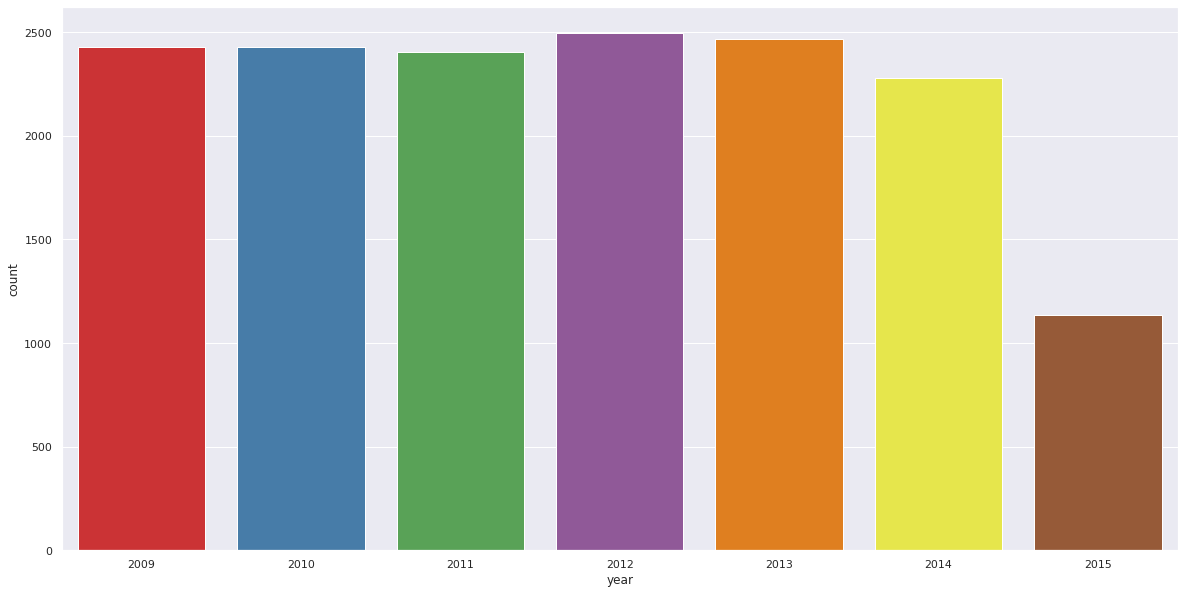

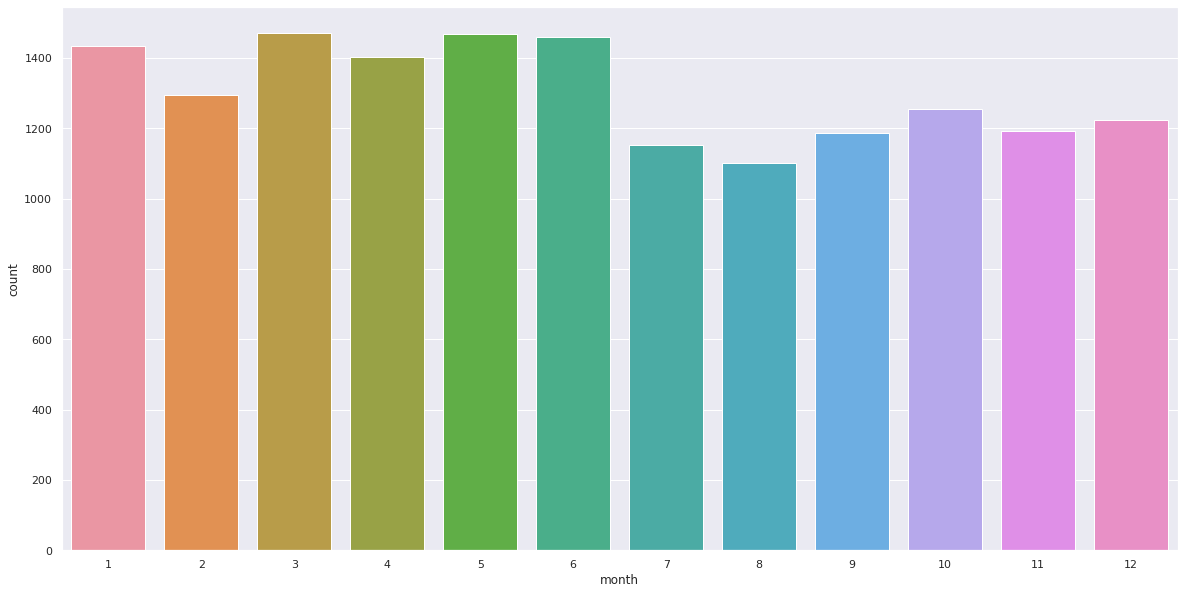

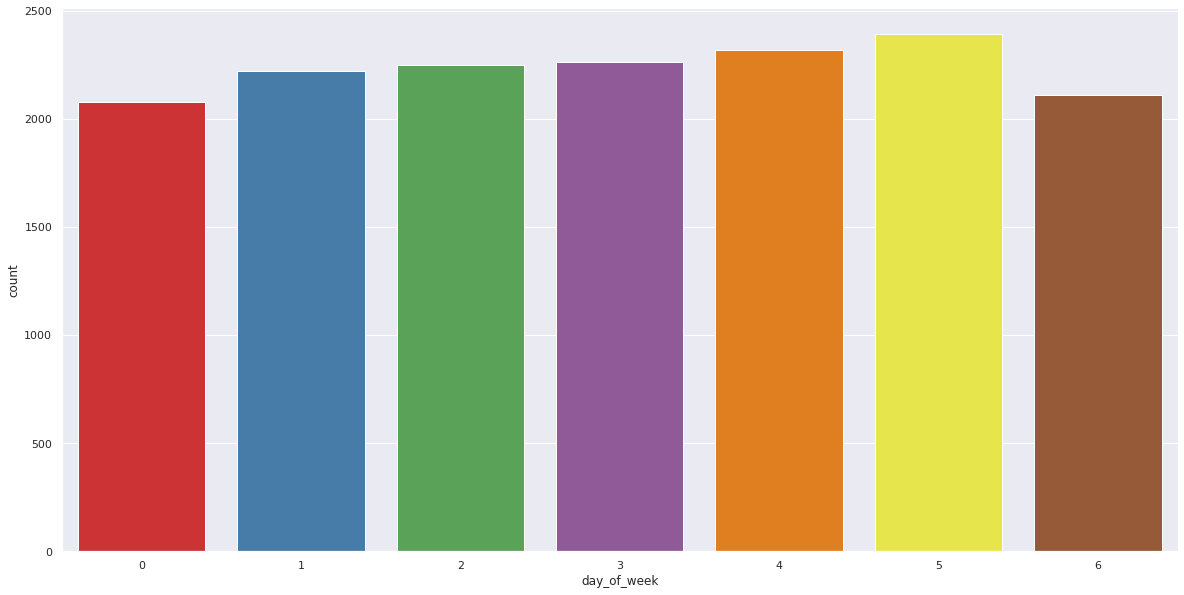

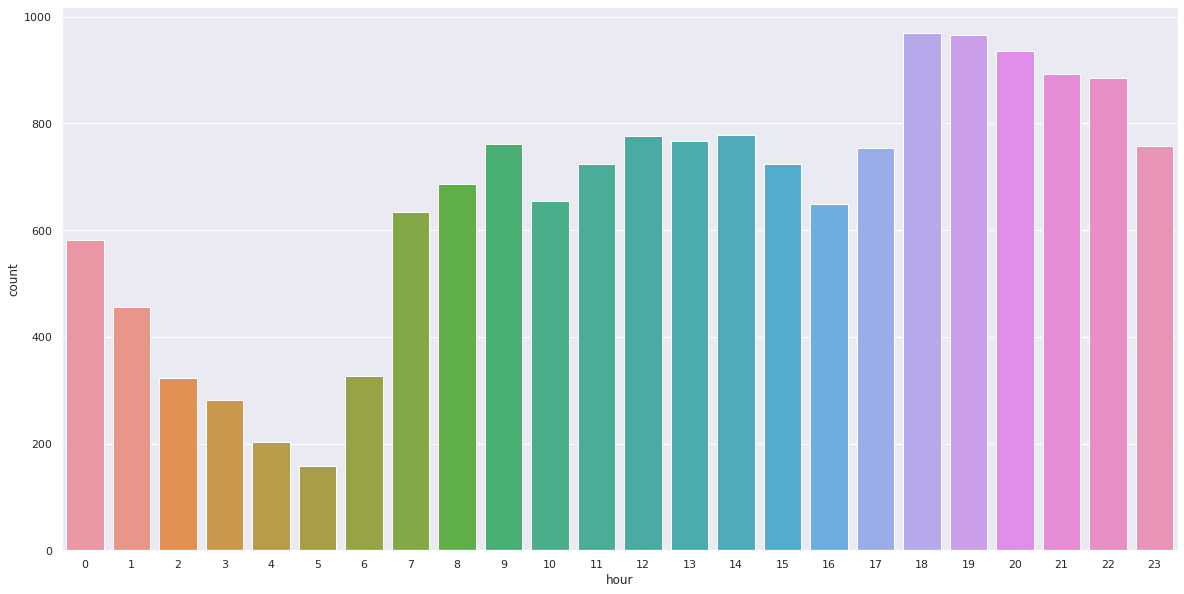

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(train['year'])
# plt.savefig('year.png')

plt.figure(figsize=(20,10))
sns.countplot(train['month'])
# plt.savefig('month.png')

plt.figure(figsize=(20,10))
sns.countplot(train['day_of_week'])
# plt.savefig('day_of_week.png')

plt.figure(figsize=(20,10))
sns.countplot(train['hour'])
# plt.savefig('hour.png')

***Feature extraction***

*   pickup_datetime-> month, year, day_of_week, hour
*   month -> season_spring, summer, fall, winter


*  day_of_week -> weekday, weekend
*  hour-> morning, afternoon, evening, night_am, night_pm 






In [ ]:
def season(x):
  ''' for seasons in a year using month column'''
  if (x>=3) and (x<=5):
    return "spring"
  elif (x>=6) and (x<=8):
    return "summer"
  elif (x>=9) and (x<=11):
    return "fall"
  elif (x>=12) | (x<=2):
    return "winter"

In [ ]:
train['season'] = train['month'].apply(season)
test['season'] = test['month'].apply(season)

In [ ]:
train['season'].head()
test['season'].head()

0    winter
1    winter
2      fall
3    winter
4    winter
Name: season, dtype: object

In [ ]:
def day_week(x):
  ''' for week:weekday/weekend in a day_of_week column '''
  if (x>=0) and (x<=4):
    return "weekday"
  elif(x>=5) and (x<=6):
    return "weekend"

In [ ]:
train['week']=train['day_of_week'].apply(day_week)
test['week']=test['day_of_week'].apply(day_week)

In [ ]:
train['week'].head()
test['week'].head()

0    weekday
1    weekday
2    weekend
3    weekend
4    weekend
Name: week, dtype: object

In [ ]:
def session(x):
  if (x>=5) and (x<=11):
    return "morning"
  elif (x>=12) and (x<=16):
    return "afternoon"
  elif (x>=17) and (x<=20):
    return "evening"
  elif (x>=21) and (x<=23):
    return "night_pm"
  elif (x>=0) and (x<=4):
    return "night_am"

In [ ]:
train['session'] = train['hour'].apply(session)
test['session'] = test['hour'].apply(session)

In [ ]:
train['session'].head()

0      evening
1    afternoon
2     night_am
3     night_am
4      morning
Name: session, dtype: object

In [ ]:
test['session'].head()


0    afternoon
1    afternoon
2      morning
3     night_pm
4     night_pm
Name: session, dtype: object

In [ ]:
train.shape

(15638, 14)

In [ ]:
test.shape

(9914, 13)

In [ ]:
train.head()

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,day_of_week,season,week,session
0,2009-06-15 17:26:21+00:00,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,17,0,summer,weekday,evening
1,2010-01-05 16:52:16+00:00,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16,1,winter,weekday,afternoon
2,2011-08-18 00:35:00+00:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,0,3,summer,weekday,night_am
3,2012-04-21 04:30:42+00:00,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,4,5,spring,weekend,night_am
4,2010-03-09 07:51:00+00:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,7,1,spring,weekday,morning


#### 2.Feature Engineering for passenger_count variable
- Because models in scikit learn require numerical input,if dataset contains categorical variables then we have to encode them.
- We will use one hot encoding technique for passenger_count variable.

In [ ]:
train['passenger_count'].describe()

count     15638
unique        6
top           1
freq      11041
Name: passenger_count, dtype: int64

In [ ]:
#Creating dummies for variable


In [ ]:
passenger_count = pd.get_dummies(train['passenger_count'], prefix = 'passenger_count')
train = train.join(passenger_count)

In [ ]:
passenger_count = pd.get_dummies(test['passenger_count'], prefix = 'passenger_count')
test = test.join(passenger_count)

In [ ]:
train.head()

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,day_of_week,season,week,session,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
0,2009-06-15 17:26:21+00:00,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,17,0,summer,weekday,evening,1,0,0,0,0,0
1,2010-01-05 16:52:16+00:00,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16,1,winter,weekday,afternoon,1,0,0,0,0,0
2,2011-08-18 00:35:00+00:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,0,3,summer,weekday,night_am,0,1,0,0,0,0
3,2012-04-21 04:30:42+00:00,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,4,5,spring,weekend,night_am,1,0,0,0,0,0
4,2010-03-09 07:51:00+00:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,7,1,spring,weekday,morning,1,0,0,0,0,0


In [ ]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,day_of_week,season,week,session,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,13,1,winter,weekday,afternoon,1,0,0,0,0,0
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,13,1,winter,weekday,afternoon,1,0,0,0,0,0
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,11,5,fall,weekend,morning,1,0,0,0,0,0
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,21,5,winter,weekend,night_pm,1,0,0,0,0,0
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,21,5,winter,weekend,night_pm,1,0,0,0,0,0


In [ ]:
season = pd.get_dummies(train['season'], prefix='season')
train = train.join(season)

In [ ]:
season = pd.get_dummies(test['season'], prefix='season')
test = test.join(season)

In [ ]:
train.head()

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,day_of_week,season,week,session,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,season_fall,season_spring,season_summer,season_winter
0,2009-06-15 17:26:21+00:00,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,17,0,summer,weekday,evening,1,0,0,0,0,0,0,0,1,0
1,2010-01-05 16:52:16+00:00,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16,1,winter,weekday,afternoon,1,0,0,0,0,0,0,0,0,1
2,2011-08-18 00:35:00+00:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,0,3,summer,weekday,night_am,0,1,0,0,0,0,0,0,1,0
3,2012-04-21 04:30:42+00:00,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,4,5,spring,weekend,night_am,1,0,0,0,0,0,0,1,0,0
4,2010-03-09 07:51:00+00:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,7,1,spring,weekday,morning,1,0,0,0,0,0,0,1,0,0


In [ ]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,day_of_week,season,week,session,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,season_fall,season_spring,season_summer,season_winter
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,13,1,winter,weekday,afternoon,1,0,0,0,0,0,0,0,0,1
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,13,1,winter,weekday,afternoon,1,0,0,0,0,0,0,0,0,1
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,11,5,fall,weekend,morning,1,0,0,0,0,0,1,0,0,0
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,21,5,winter,weekend,night_pm,1,0,0,0,0,0,0,0,0,1
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,21,5,winter,weekend,night_pm,1,0,0,0,0,0,0,0,0,1


In [ ]:
week = pd.get_dummies(train['week'], prefix='week')
train = train.join(week)

In [ ]:
week = pd.get_dummies(test['week'], prefix='week')
test = test.join(week)

In [ ]:
train.head()

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,day_of_week,season,week,session,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,season_fall,season_spring,season_summer,season_winter,week_weekday,week_weekend
0,2009-06-15 17:26:21+00:00,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,17,0,summer,weekday,evening,1,0,0,0,0,0,0,0,1,0,1,0
1,2010-01-05 16:52:16+00:00,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16,1,winter,weekday,afternoon,1,0,0,0,0,0,0,0,0,1,1,0
2,2011-08-18 00:35:00+00:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,0,3,summer,weekday,night_am,0,1,0,0,0,0,0,0,1,0,1,0
3,2012-04-21 04:30:42+00:00,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,4,5,spring,weekend,night_am,1,0,0,0,0,0,0,1,0,0,0,1
4,2010-03-09 07:51:00+00:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,7,1,spring,weekday,morning,1,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,day_of_week,season,week,session,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,season_fall,season_spring,season_summer,season_winter,week_weekday,week_weekend
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,13,1,winter,weekday,afternoon,1,0,0,0,0,0,0,0,0,1,1,0
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,13,1,winter,weekday,afternoon,1,0,0,0,0,0,0,0,0,1,1,0
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,11,5,fall,weekend,morning,1,0,0,0,0,0,1,0,0,0,0,1
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,21,5,winter,weekend,night_pm,1,0,0,0,0,0,0,0,0,1,0,1
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,21,5,winter,weekend,night_pm,1,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
session = pd.get_dummies(train['session'], prefix='session')
train = train.join(session)

session = pd.get_dummies(test['session'], prefix='session')
test = test.join(session)

In [ ]:
train.head()

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,day_of_week,season,week,session,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,season_fall,season_spring,season_summer,season_winter,week_weekday,week_weekend,session_afternoon,session_evening,session_morning,session_night_am,session_night_pm
0,2009-06-15 17:26:21+00:00,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,17,0,summer,weekday,evening,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
1,2010-01-05 16:52:16+00:00,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16,1,winter,weekday,afternoon,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
2,2011-08-18 00:35:00+00:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,0,3,summer,weekday,night_am,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,2012-04-21 04:30:42+00:00,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,4,5,spring,weekend,night_am,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,2010-03-09 07:51:00+00:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,7,1,spring,weekday,morning,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0


In [ ]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,day_of_week,season,week,session,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,season_fall,season_spring,season_summer,season_winter,week_weekday,week_weekend,session_afternoon,session_evening,session_morning,session_night_am,session_night_pm
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,13,1,winter,weekday,afternoon,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,13,1,winter,weekday,afternoon,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,11,5,fall,weekend,morning,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,21,5,winter,weekend,night_pm,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,21,5,winter,weekend,night_pm,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1


In [ ]:
year = pd.get_dummies(train['year'], prefix='year')
train = train.join(year)

year = pd.get_dummies(test['year'], prefix='year')
test = test.join(year)

In [ ]:
train.head()

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,day_of_week,season,week,session,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,season_fall,season_spring,season_summer,season_winter,week_weekday,week_weekend,session_afternoon,session_evening,session_morning,session_night_am,session_night_pm,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015
0,2009-06-15 17:26:21+00:00,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,17,0,summer,weekday,evening,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
1,2010-01-05 16:52:16+00:00,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16,1,winter,weekday,afternoon,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0
2,2011-08-18 00:35:00+00:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,0,3,summer,weekday,night_am,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
3,2012-04-21 04:30:42+00:00,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,4,5,spring,weekend,night_am,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4,2010-03-09 07:51:00+00:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,7,1,spring,weekday,morning,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,day_of_week,season,week,session,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,season_fall,season_spring,season_summer,season_winter,week_weekday,week_weekend,session_afternoon,session_evening,session_morning,session_night_am,session_night_pm,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,13,1,winter,weekday,afternoon,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,13,1,winter,weekday,afternoon,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,11,5,fall,weekend,morning,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,21,5,winter,weekend,night_pm,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,21,5,winter,weekend,night_pm,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0


we will drop one column from each one-hot-encoded variables

In [ ]:
train.columns

Index(['pickup_datetime', 'fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'hour', 'day_of_week', 'season', 'week', 'session',
       'passenger_count_1', 'passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'week_weekday', 'week_weekend', 'session_afternoon', 'session_evening',
       'session_morning', 'session_night_am', 'session_night_pm', 'year_2009',
       'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014',
       'year_2015'],
      dtype='object')

In [ ]:
train=train.drop(['passenger_count_1','season_fall','week_weekday','session_afternoon','year_2009'],axis=1)
test=test.drop(['passenger_count_1','season_fall','week_weekday','session_afternoon','year_2009'],axis=1)

#### 3.Feature Engineering for latitude and longitude variable
-  As we have latitude and longitude data for pickup and dropoff, we will find the distance the cab travelled from pickup and dropoff location.

In [ ]:
# Calculate distance the cab travelled from pickup and dropoff location using great_circle from geopy library

from geopy.distance import geodesic
from geopy.distance import great_circle
data = [train, test]
for i in data:
    i['great_circle']=i.apply(lambda x: great_circle((x['pickup_latitude'],x['pickup_longitude']), (x['dropoff_latitude'],x['dropoff_longitude'])).miles, axis=1)
    i['geodesic']=i.apply(lambda x: geodesic((x['pickup_latitude'],x['pickup_longitude']),(x['dropoff_latitude'],x['dropoff_longitude'])).miles, axis=1)

In [ ]:
train.head()

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,day_of_week,season,week,session,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,season_spring,season_summer,season_winter,week_weekend,session_evening,session_morning,session_night_am,session_night_pm,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,great_circle,geodesic
0,2009-06-15 17:26:21+00:00,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,17,0,summer,weekday,evening,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.640488,0.639764
1,2010-01-05 16:52:16+00:00,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16,1,winter,weekday,afternoon,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,5.250677,5.246511
2,2011-08-18 00:35:00+00:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,0,3,summer,weekday,night_am,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0.863412,0.863167
3,2012-04-21 04:30:42+00:00,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,4,5,spring,weekend,night_am,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1.739388,1.737223
4,2010-03-09 07:51:00+00:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,7,1,spring,weekday,morning,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1.242220,1.241710


In [ ]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,day_of_week,season,week,session,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,season_spring,season_summer,season_winter,week_weekend,session_evening,session_morning,session_night_am,session_night_pm,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,great_circle,geodesic
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,13,1,winter,weekday,afternoon,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1.443609,1.442197
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,13,1,winter,weekday,afternoon,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1.507047,1.506080
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,11,5,fall,weekend,morning,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0.384398,0.384120
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,21,5,winter,weekend,night_pm,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1.218531,1.217683
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,21,5,winter,weekend,night_pm,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,3.347519,3.344737


As Vincenty is more accurate than haversine. Also vincenty is prefered for short distances.Therefore we will drop great_circle. we will drop them together with other variables which were used to feature engineer.

In [ ]:
train.isna().sum()

pickup_datetime      0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
hour                 0
day_of_week          0
season               0
week                 0
session              0
passenger_count_2    0
passenger_count_3    0
passenger_count_4    0
passenger_count_5    0
passenger_count_6    0
season_spring        0
season_summer        0
season_winter        0
week_weekend         0
session_evening      0
session_morning      0
session_night_am     0
session_night_pm     0
year_2010            0
year_2011            0
year_2012            0
year_2013            0
year_2014            0
year_2015            0
great_circle         0
geodesic             0
dtype: int64

In [ ]:
test.isna().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
hour                 0
day_of_week          0
season               0
week                 0
session              0
passenger_count_2    0
passenger_count_3    0
passenger_count_4    0
passenger_count_5    0
passenger_count_6    0
season_spring        0
season_summer        0
season_winter        0
week_weekend         0
session_evening      0
session_morning      0
session_night_am     0
session_night_pm     0
year_2010            0
year_2011            0
year_2012            0
year_2013            0
year_2014            0
year_2015            0
great_circle         0
geodesic             0
dtype: int64

#### We will remove the variables which were used to feature engineer new variables

In [ ]:
train=train.drop(['pickup_datetime','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day_of_week', 'hour', 'session', 'season', 'week','great_circle'],axis=1)

test=test.drop(['pickup_datetime','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day_of_week', 'hour', 'session', 'season', 'week','great_circle'],axis=1)

In [ ]:
train.shape,test.shape

((15638, 21), (9914, 20))

In [ ]:
train.head()

,fare_amount,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,season_spring,season_summer,season_winter,week_weekend,session_evening,session_morning,session_night_am,session_night_pm,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,geodesic
0,4.5,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.639764
1,16.9,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,5.246511
2,5.7,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0.863167
3,7.7,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1.737223
4,5.3,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1.241710


In [ ]:
test.head()

,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,season_spring,season_summer,season_winter,week_weekend,session_evening,session_morning,session_night_am,session_night_pm,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,geodesic
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1.442197
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1.506080
2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0.384120
3,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1.217683
4,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,3.344737


In [ ]:
train.columns

Index(['fare_amount', 'passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6',
       'season_spring', 'season_summer', 'season_winter', 'week_weekend',
       'session_evening', 'session_morning', 'session_night_am',
       'session_night_pm', 'year_2010', 'year_2011', 'year_2012', 'year_2013',
       'year_2014', 'year_2015', 'geodesic'],
      dtype='object')

In [ ]:
test.columns

Index(['passenger_count_2', 'passenger_count_3', 'passenger_count_4',
       'passenger_count_5', 'passenger_count_6', 'season_spring',
       'season_summer', 'season_winter', 'week_weekend', 'session_evening',
       'session_morning', 'session_night_am', 'session_night_pm', 'year_2010',
       'year_2011', 'year_2012', 'year_2013', 'year_2014', 'year_2015',
       'geodesic'],
      dtype='object')

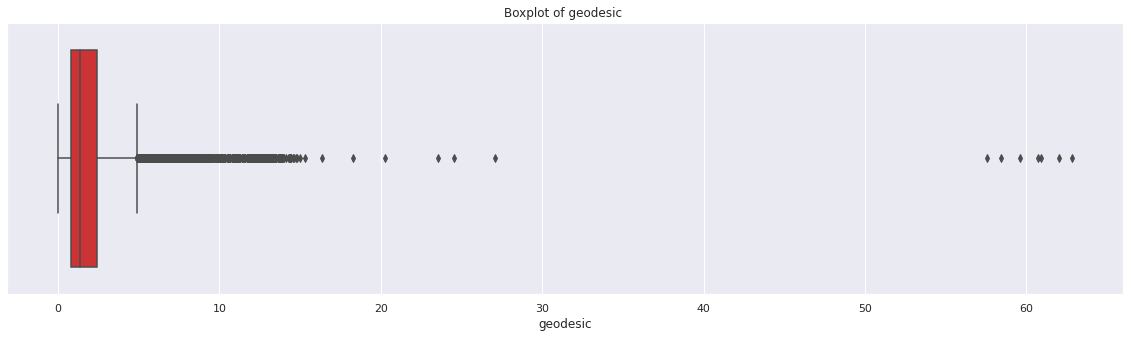

In [ ]:
plt.figure(figsize=(20,5)) 
sns.boxplot(x=train['geodesic'],data=train,orient='h')
plt.title('Boxplot of geodesic ')
# plt.savefig('bp geodesic.png')
plt.show()

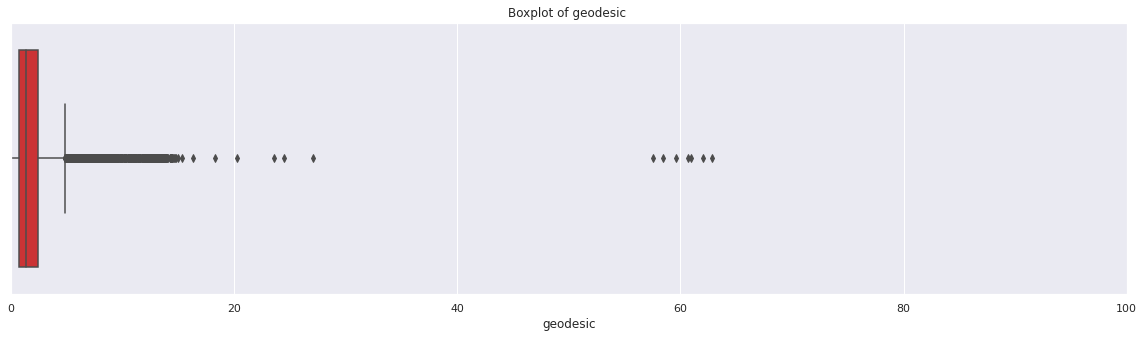

In [ ]:
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=train['geodesic'],data=train,orient='h')
plt.title('Boxplot of geodesic ')
# plt.savefig('bp geodesic.png')
plt.show()

In [ ]:
outlier_treatment('geodesic')

2.4218211084918373 0.7815163831107116
-1.678940704960977 4.882278196563526


In [ ]:
pd.DataFrame(train.isnull().sum())

,0
fare_amount,0
passenger_count_2,0
passenger_count_3,0
passenger_count_4,0
passenger_count_5,0
passenger_count_6,0
season_spring,0
season_summer,0
season_winter,0
week_weekend,0


In [ ]:
#Imputing with missing values using KNN
train = pd.DataFrame(KNN(k = 3).fit_transform(train), columns = train.columns, index=train.index)

Imputing row 1/15638 with 0 missing, elapsed time: 53.038
Imputing row 101/15638 with 0 missing, elapsed time: 53.040
Imputing row 201/15638 with 0 missing, elapsed time: 53.041
Imputing row 301/15638 with 1 missing, elapsed time: 53.042
Imputing row 401/15638 with 0 missing, elapsed time: 53.044
Imputing row 501/15638 with 0 missing, elapsed time: 53.046
Imputing row 601/15638 with 1 missing, elapsed time: 53.047
Imputing row 701/15638 with 0 missing, elapsed time: 53.048
Imputing row 801/15638 with 0 missing, elapsed time: 53.050
Imputing row 901/15638 with 0 missing, elapsed time: 53.051
Imputing row 1001/15638 with 0 missing, elapsed time: 53.052
Imputing row 1101/15638 with 1 missing, elapsed time: 53.054
Imputing row 1201/15638 with 0 missing, elapsed time: 53.055
Imputing row 1301/15638 with 0 missing, elapsed time: 53.056
Imputing row 1401/15638 with 0 missing, elapsed time: 53.058
Imputing row 1501/15638 with 0 missing, elapsed time: 53.059
Imputing row 1601/15638 with 0 missi

In [ ]:
pd.DataFrame(train.isnull().sum())

,0
fare_amount,0
passenger_count_2,0
passenger_count_3,0
passenger_count_4,0
passenger_count_5,0
passenger_count_6,0
season_spring,0
season_summer,0
season_winter,0
week_weekend,0


## Feature Selection
1.Correlation Analysis

    Statistically correlated: features move together directionally.
    Linear models assume feature independence.
    And if features are correlated that could introduce bias into our models.

In [ ]:
train.head()

,fare_amount,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,season_spring,season_summer,season_winter,week_weekend,session_evening,session_morning,session_night_am,session_night_pm,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,geodesic
0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.639764
1,16.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.387906
2,5.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.863167
3,7.7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.737223
4,5.3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.241710


In [ ]:
cat_var=['passenger_count_2',
       'passenger_count_3', 'passenger_count_4', 'passenger_count_5',
       'passenger_count_6', 'season_spring', 'season_summer',
       'season_winter', 'week_weekend',
       'session_evening', 'session_morning', 'session_night_am',
       'session_night_pm', 'year_2010', 'year_2011',
       'year_2012', 'year_2013', 'year_2014', 'year_2015']
num_var=['fare_amount','geodesic']

train[cat_var]=train[cat_var].apply(lambda x: x.astype('category') )
test[cat_var]=test[cat_var].apply(lambda x: x.astype('category') ) 

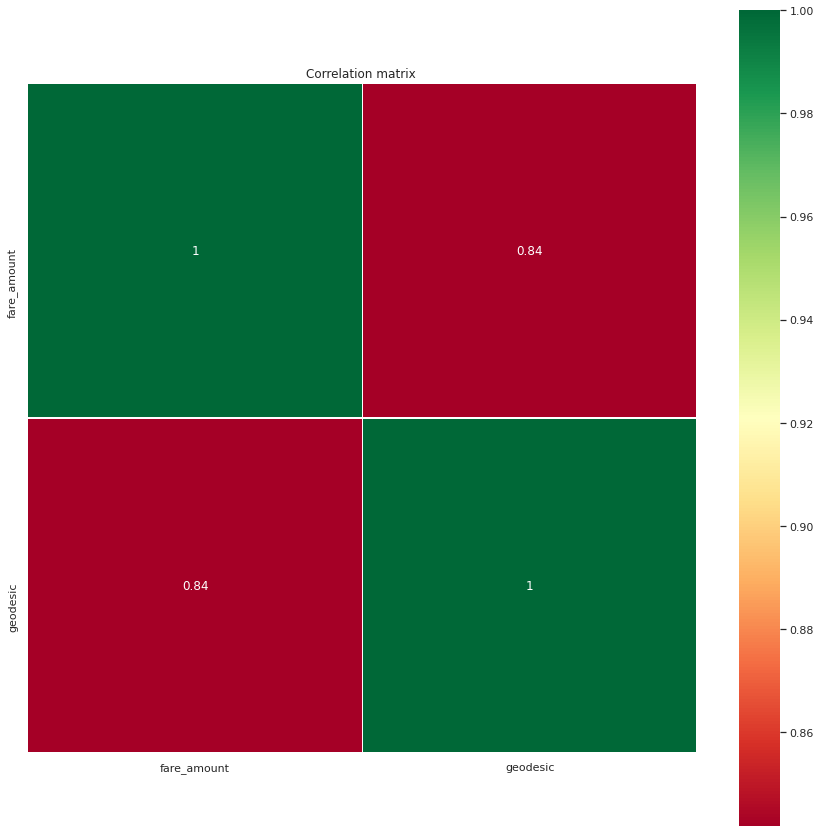

In [ ]:
#We will plot a Heatmap of correlation whereas, correlation measures how strongly 2 quantities are related to each other.
# heatmap using correlation matrix
plt.figure(figsize=(15,15))
_ = sns.heatmap(train[num_var].corr(), square=True, cmap='RdYlGn',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')
# plt.savefig('correlation.png')
plt.show()

As we can see from above correlation plot fare_amount and geodesic is correlated to each other.

Jointplots for Bivariate Analysis.
Here Scatter plot has regression line between 2 variables along with separate Bar plots of both variables.
Also its annotated with pearson correlation coefficient and p value.

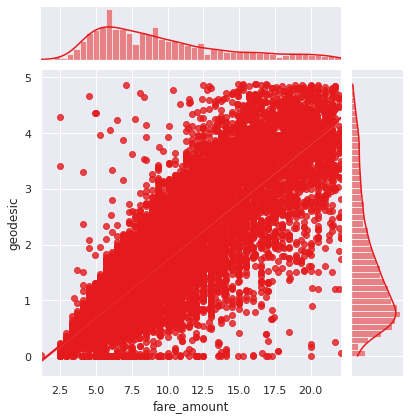

In [ ]:
import seaborn as sns
import scipy.stats as stats
_ = sns.jointplot(x='fare_amount',y='geodesic',data=train,kind = 'reg')
# _.annotate(stats.pearsonr)
# plt.savefig('jointct.png')
plt.show()

### Chi-square test of Independence for Categorical Variables/Features
-  Hypothesis testing :
    -  Null Hypothesis: 2 variables are independent.
    -  Alternate Hypothesis: 2 variables are not independent.
-  If p-value is less than 0.05 then we reject the null hypothesis saying that 2 variables are dependent.
-  And if p-value is greater than 0.05 then we accept the null hypothesis saying that 2 variables are independent. 
-  There should be no dependencies between Independent variables.
-  So we will remove that variable whose p-value with other variable is low than 0.05.
-  And we will keep that variable whose p-value with other variable is high than 0.05

In [ ]:
from scipy.stats import chi2_contingency
#loop for chi square values
for i in cat_var:
    for j in cat_var:
        if(i != j):
            chi2, p, dof, ex = chi2_contingency(pd.crosstab(train[i], train[j]))
            if(p < 0.05):
                print(i,"and",j,"are dependent on each other with",p,'----Remove')
            else:
                print(i,"and",j,"are independent on each other with",p,'----Keep')

passenger_count_2 and passenger_count_3 are dependent on each other with 1.9792986593047185e-27 ----Remove
passenger_count_2 and passenger_count_4 are dependent on each other with 1.1880081228620271e-13 ----Remove
passenger_count_2 and passenger_count_5 are dependent on each other with 1.2266274340403237e-42 ----Remove
passenger_count_2 and passenger_count_6 are dependent on each other with 1.1590987690221857e-12 ----Remove
passenger_count_2 and season_spring are independent on each other with 0.9597451507636623 ----Keep
passenger_count_2 and season_summer are dependent on each other with 0.024483381318864773 ----Remove
passenger_count_2 and season_winter are independent on each other with 0.4857367569494625 ----Keep
passenger_count_2 and week_weekend are dependent on each other with 4.428597764068177e-11 ----Remove
passenger_count_2 and session_evening are dependent on each other with 0.015355005133602424 ----Remove
passenger_count_2 and session_morning are dependent on each other wit

## Analysis of Variance(Anova) Test
-  It is carried out to compare between each groups in a categorical variable.
-  ANOVA only lets us know the means for different groups are same or not. It doesn’t help us identify which mean is different.
-  Hypothesis testing :
    -  Null Hypothesis: mean of all categories in a variable are same.
    -  Alternate Hypothesis: mean of at least one category in a variable is different.
-  If p-value is less than 0.05 then we reject the null hypothesis.
-  And if p-value is greater than 0.05 then we accept the null hypothesis.

In [ ]:
train.columns

Index(['fare_amount', 'passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6',
       'season_spring', 'season_summer', 'season_winter', 'week_weekend',
       'session_evening', 'session_morning', 'session_night_am',
       'session_night_pm', 'year_2010', 'year_2011', 'year_2012', 'year_2013',
       'year_2014', 'year_2015', 'geodesic'],
      dtype='object')

In [ ]:
#ANOVA _1)+C(passenger_count_2)+C(passenger_count_3)+C(passenger_count_4)+C(passenger_count_5)+C(passenger_count_6)
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('fare_amount ~ C(passenger_count_2)+C(passenger_count_3)+C(passenger_count_4)+C(passenger_count_5)+C(passenger_count_6)+C(season_spring)+C(season_summer)+C(season_winter)+C(week_weekend)+C(session_night_am)+C(session_night_pm)+C(session_evening)+C(session_morning)+C(year_2010)+C(year_2011)+C(year_2012)+C(year_2013)+C(year_2014)+C(year_2015)',data=train).fit()
                
aov_table = sm.stats.anova_lm(model)
aov_table.round(2)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,df,sum_sq,mean_sq,F,PR(>F)
C(passenger_count_2),1.0,10.02,10.02,0.52,0.47
C(passenger_count_3),1.0,18.48,18.48,0.95,0.33
C(passenger_count_4),1.0,63.71,63.71,3.29,0.07
C(passenger_count_5),1.0,19.98,19.98,1.03,0.31
C(passenger_count_6),1.0,147.55,147.55,7.61,0.01
C(season_spring),1.0,28.60,28.60,1.48,0.22
C(season_summer),1.0,27.29,27.29,1.41,0.24
C(season_winter),1.0,479.40,479.40,24.74,0.00
C(week_weekend),1.0,131.20,131.20,6.77,0.01
C(session_night_am),1.0,2126.12,2126.12,109.72,0.00


Every variable has p-value less than 0.05 therefore we reject the null hypothesis.

## Multicollinearity Test
-  VIF is always greater or equal to 1.
-  if VIF is 1 --- Not correlated to any of the variables.
-  if VIF is between 1-5 --- Moderately correlated.
-  if VIF is above 5 --- Highly correlated.
-  If there are multiple variables with VIF greater than 5, only remove the variable with the highest VIF.

In [ ]:
# _1+passenger_count_2+passenger_count_3+passenger_count_4+passenger_count_5+passenger_count_6

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
outcome, predictors = dmatrices('fare_amount ~ geodesic+passenger_count_2+passenger_count_3+passenger_count_4+passenger_count_5+passenger_count_6+season_spring+season_summer+season_winter+week_weekend+session_night_am+session_night_pm+session_evening+session_morning+year_2010+year_2011+year_2012+year_2013+year_2014+year_2015',train, return_type='dataframe')
# calculating VIF for each individual Predictors
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns
vif

,VIF,features
0,15.254896,Intercept
1,1.040682,passenger_count_2[T.1.0]
2,1.019418,passenger_count_3[T.1.0]
3,1.011862,passenger_count_4[T.1.0]
4,1.024965,passenger_count_5[T.1.0]
5,1.017137,passenger_count_6[T.1.0]
6,1.641094,season_spring[T.1.0]
7,1.551644,season_summer[T.1.0]
8,1.586771,season_winter[T.1.0]
9,1.050910,week_weekend[T.1.0]


So we have no or very low multicollinearity

### Feature Scaling Check with or without normalization of standarscalar

In [ ]:
train[num_var].var()

fare_amount    20.053397
geodesic        1.229925
dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


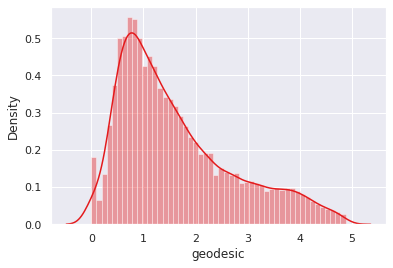

In [ ]:
sns.distplot(train['geodesic'],bins=50)
# plt.savefig('distplot.png')

((array([-3.91973301, -3.70049898, -3.58040157, ...,  3.58040157,
          3.70049898,  3.91973301]),
  array([0.        , 0.        , 0.        , ..., 4.87506037, 4.87588108,
         4.87992998])),
 (1.060871740106039, 1.6270909871473038, 0.9563872858530124))

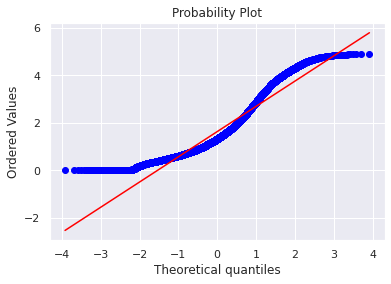

In [ ]:
plt.figure()
stats.probplot(train['geodesic'], dist='norm', fit=True,plot=plt)
# plt.savefig('qq prob plot.png')

In [ ]:
#Normalization
train['geodesic'] = (train['geodesic'] - min(train['geodesic']))/(max(train['geodesic']) - min(train['geodesic']))
test['geodesic'] = (test['geodesic'] - min(test['geodesic']))/(max(test['geodesic']) - min(test['geodesic']))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


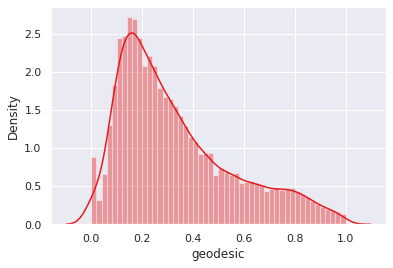

In [ ]:
sns.distplot(train['geodesic'],bins=50)
plt.savefig('distplot.png')

((array([-3.91973301, -3.70049898, -3.58040157, ...,  3.58040157,
          3.70049898,  3.91973301]),
  array([0.        , 0.        , 0.        , ..., 0.99900212, 0.9991703 ,
         1.        ])),
 (0.21739486924349175, 0.3334250682959996, 0.9563872858530122))

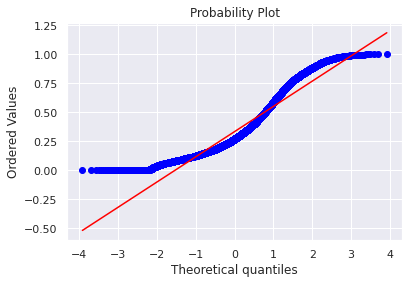

In [ ]:
plt.figure()
stats.probplot(train['geodesic'], dist='norm', fit=True,plot=plt)
# plt.savefig('qq prob plot.png')

In [ ]:
train.columns

Index(['fare_amount', 'passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6',
       'season_spring', 'season_summer', 'season_winter', 'week_weekend',
       'session_evening', 'session_morning', 'session_night_am',
       'session_night_pm', 'year_2010', 'year_2011', 'year_2012', 'year_2013',
       'year_2014', 'year_2015', 'geodesic'],
      dtype='object')

In [ ]:
train.columns

Index(['fare_amount', 'passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6',
       'season_spring', 'season_summer', 'season_winter', 'week_weekend',
       'session_evening', 'session_morning', 'session_night_am',
       'session_night_pm', 'year_2010', 'year_2011', 'year_2012', 'year_2013',
       'year_2014', 'year_2015', 'geodesic'],
      dtype='object')

In [ ]:
train.head()

,fare_amount,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,season_spring,season_summer,season_winter,week_weekend,session_evening,session_morning,session_night_am,session_night_pm,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,geodesic
0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.131101
1,16.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.079490
2,5.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.176881
3,7.7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.355993
4,5.3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.254452


In [ ]:
train.shape

(15638, 21)

## Splitting train into train and validation subsets
- X_train y_train--are train subset
- X_test y_test--are validation subset

In [ ]:
X = train.drop('fare_amount',axis=1).values
y = train['fare_amount'].values

In [ ]:
X.shape, y.shape

((15638, 20), (15638,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=27)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11728, 20), (3910, 20), (11728,), (3910,))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb


model_params = {

'Linear Regression':{
'model': LinearRegression(),
'params': {
'copy_X':[True, False],
          'fit_intercept':[True,False]
}
},

'Ridge':{
'model': Ridge(),
'params': {
'alpha':np.logspace(-4, 0, 50),
'normalize':[True,False],
'max_iter':range(500,5000,500)
}
},

'Lasso':{
'model': Lasso(),
'params': {
'alpha':np.logspace(-4, 0, 50),
'normalize':[True,False],
'max_iter':range(500,5000,500)}
},

# 'DecisionTreeRegressor':{
# 'model': DecisionTreeRegressor(),
# 'params': {
# 'max_depth': range(2,16,2),
# 'min_samples_split': range(2,16,2)}
# },

# 'RandomForestRegressor':{
# 'model': RandomForestRegressor(),
# 'params': {
# 'n_estimators': range(100,500,100),
# 'max_depth': range(5,20,1),
# 'min_samples_leaf':range(2,5,1),
# 'max_features':['auto','sqrt','log2'],
# 'bootstrap': [True, False],
# 'min_samples_split': range(2,5,1)}
# },

# 'XGBRegressor':{
# 'model': XGBRegressor(),
# 'params': {
# "objective":"reg:linear",
# 'colsample_bytree': 0.3,
# 'learning_rate': 0.1,
# 'max_depth': 5, 
# 'alpha': 10}
# },
}

In [ ]:
scores = []
for model_name, mp in model_params.items():
  clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='r2')
  clf.fit(X, y)
  scores.append({
      'model': model_name,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_,
      'best_estimators': clf.best_estimator_
  })

In [ ]:
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params', 'best_estimators'])
df

,model,best_score,best_params,best_estimators
0,Linear Regression,0.736293,"{'copy_X': True, 'fit_intercept': True}","LinearRegression(copy_X=True, fit_intercept=Tr..."
1,Ridge,0.736294,"{'alpha': 0.0004498432668969444, 'max_iter': 5...","Ridge(alpha=0.0004498432668969444, copy_X=True..."
2,Lasso,0.736299,"{'alpha': 0.00030888435964774815, 'max_iter': ...","Lasso(alpha=0.00030888435964774815, copy_X=Tru..."


In [ ]:
model_params_ = {

'DecisionTreeRegressor':{
'model': DecisionTreeRegressor(),
'params': {
'max_depth': range(2,16,2),
'min_samples_split': range(2,16,2)}
},

'RandomForestRegressor':{
'model': RandomForestRegressor(),
'params': {
'n_estimators': range(100,500,100),
'max_depth': range(5,20,1),
'min_samples_leaf':range(2,5,1),
'max_features':['auto','sqrt','log2'],
'bootstrap': [True, False],
'min_samples_split': range(2,5,1)}
},
}

In [ ]:
scores = []
for model_name, mp in model_params_.items():
  clf = GridSearchCV(mp['model'], mp['params'], cv=5)
  clf.fit(X, y)
  scores.append({
      'model': model_name,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_,
      'best_estimators': clf.best_estimator_
  })

In [ ]:
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params', 'best_estimators'])
df

# Mulivariate Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Setup the parameters 
param_dist = {'copy_X':[True, False],
          'fit_intercept':[True,False]}

# Instatntiate a regressor: reg
reg = LinearRegression()

# Instantiate the gridsearchCV object:reg_cv
reg_cv = GridSearchCV(reg, param_dist, cv=5, scoring='r2')

# Fit the data 
reg_cv.fit(X, y)

# print the tuned parameter and score
print(f"The best param is : {reg_cv.best_params_}\nThe best score is : {reg_cv.best_score_}\nThe best estimator is : {reg_cv.best_estimator_} ")


The best param is : {'copy_X': True, 'fit_intercept': True}
The best score is : 0.7362934598676838
The best estimator is : LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 


# Create Multiple Linear Regression using Tuned Decision reg Parameters

In [ ]:
# Instantiate the multilinear regressor with using best tuned parameter
reg_all = LinearRegression(copy_X= True, fit_intercept= True)

#Fit the regression to training data
reg_all.fit(X_train, y_train)

# Predic on the test data:y_pred
y_pred = reg_all.predict(X_test)

# Compute and print r^2 and RMSE
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.7506689582331034
2.2556684025386073


In [ ]:
# Create the regressor: reg_all
reg_all = LinearRegression(copy_X= True, fit_intercept=True)

In [ ]:
# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

In [ ]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))
test_scores(reg_all)

R^2: 0.7506689582331034
Root Mean Squared Error: 2.2556684025386073


NameError: ignored

In [ ]:
# Compute and print the coefficients
reg_coef = reg_all.coef_
print(reg_coef)

In [ ]:
# Plot the coefficients
plt.figure(figsize=(15,5))
plt.plot(range(len(test.columns)), reg_coef)
plt.xticks(range(len(test.columns)), test.columns.values, rotation=60)
plt.margins(0.02)
plt.savefig('linear coefficients')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5,scoring='neg_mean_squared_error')

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

In [ ]:
from sklearn.linear_model import Ridge
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'alpha':np.logspace(-4, 0, 50),
          'normalize':[True,False],
             'max_iter':range(500,5000,500)}
# Instantiate a Decision ridge classifier: ridge
ridge = Ridge()

# Instantiate the gridSearchCV object: ridge_cv
ridge_cv = GridSearchCV(ridge, param_dist, cv=5,scoring='r2')

# Fit it to the data
ridge_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision ridge Parameters: {}".format(ridge_cv.best_params_))
print("Best score is {}".format(ridge_cv.best_score_))

In [ ]:
# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.0004498432668969444, normalize=True,max_iter = 500)

# Fit the regressor to the data
ridge.fit(X_train,y_train)

# Compute and print the coefficients
ridge_coef = ridge.coef_
print(ridge_coef)

# Plot the coefficients
plt.figure(figsize=(15,5))
plt.plot(range(len(test.columns)), ridge_coef)
plt.xticks(range(len(test.columns)), test.columns.values, rotation=60)
plt.margins(0.02)
# plt.savefig('ridge coefficients')
plt.show()
test_scores(ridge)

In [ ]:
from sklearn.linear_model import Lasso
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'alpha':np.logspace(-4, 0, 50),
          'normalize':[True,False],
             'max_iter':range(500,5000,500)}
# Instantiate a Decision lasso classifier: lasso
lasso = Lasso()

# Instantiate the gridSearchCV object: lasso_cv
lasso_cv = GridSearchCV(lasso, param_dist, cv=5,scoring='r2')

# Fit it to the data
lasso_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision lasso Parameters: {}".format(lasso_cv.best_params_))
print("Best score is {}".format(lasso_cv.best_score_))

In [ ]:
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.00014563484775012445, normalize=False,max_iter = 500)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.figure(figsize=(15,5))
plt.ylim(-1,10)
plt.plot(range(len(test.columns)), lasso_coef)
plt.xticks(range(len(test.columns)), test.columns.values, rotation=60)
plt.margins(0.02)
plt.savefig('lasso coefficients')
plt.show()
test_scores(lasso)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'max_depth': range(2,16,2),
              'min_samples_split': range(2,16,2)}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeRegressor()

# Instantiate the gridSearchCV object: tree_cv
tree_cv = GridSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

In [ ]:
# Instantiate a tree regressor: tree
tree = DecisionTreeRegressor(max_depth= 6, min_samples_split=2)

# Fit the regressor to the data
tree.fit(X_train,y_train)

# Compute and print the coefficients
tree_features = tree.feature_importances_
print(tree_features)

# Sort test importances in descending order
indices = np.argsort(tree_features)[::1]

# Rearrange test names so they match the sorted test importances
names = [test.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(20,10))
plt.title("test Importance")

# Add horizontal bars
plt.barh(range(pd.DataFrame(X_train).shape[1]),tree_features[indices],align = 'center')
plt.yticks(range(pd.DataFrame(X_train).shape[1]), names)
plt.savefig('tree test importance')
plt.show()
# Make predictions and cal error
test_scores(tree)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Create the random grid
random_grid = {'n_estimators': range(100,500,100),
               'max_depth': range(5,20,1),
               'min_samples_leaf':range(2,5,1),
              'max_features':['auto','sqrt','log2'],
              'bootstrap': [True, False],
              'min_samples_split': range(2,5,1)}
# Instantiate a Decision Forest classifier: Forest
Forest = RandomForestRegressor()

# Instantiate the gridSearchCV object: Forest_cv
Forest_cv = RandomizedSearchCV(Forest, random_grid, cv=5)

# Fit it to the data
Forest_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(Forest_cv.best_params_))
print("Best score is {}".format(Forest_cv.best_score_))

In [ ]:
# Instantiate a Forest regressor: Forest
Forest = RandomForestRegressor(n_estimators=100, min_samples_split= 2, min_samples_leaf=4, max_features='auto', max_depth=9, bootstrap=True)

# Fit the regressor to the data
Forest.fit(X_train,y_train)

# Compute and print the coefficients
Forest_features = Forest.feature_importances_
print(Forest_features)

# Sort feature importances in descending order
indices = np.argsort(Forest_features)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [test.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(20,10))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(pd.DataFrame(X_train).shape[1]),Forest_features[indices],align = 'center')
plt.yticks(range(pd.DataFrame(X_train).shape[1]), names)
plt.savefig('Random forest feature importance')
plt.show()# Make predictions
test_scores(Forest)

In [ ]:
from sklearn.model_selection import cross_val_score
# Create a random forest regression object: Forest
Forest = RandomForestRegressor(n_estimators=400, min_samples_split= 2, min_samples_leaf=4, max_features='auto', max_depth=12, bootstrap=True)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(Forest,X,y,cv=5,scoring='neg_mean_squared_error')

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

# Improving accuracy using XGBOOST

In [ ]:
from xgboost import XGBRegressor
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X,label=y)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

print(data_dmatrix, dtrain, dtest)

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()

In [ ]:
# the final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

In [ ]:
Xgb = XGBRegressor()
Xgb.fit(X_train,y_train)
# pred_xgb = model_xgb.predict(X_test)
test_scores(Xgb)

In [ ]:
# Create the random grid
para = {'n_estimators': range(100,500,100),
               'max_depth': range(3,10,1),
        'reg_alpha':np.logspace(-4, 0, 50),
        'subsample': np.arange(0.1,1,0.2),
        'colsample_bytree': np.arange(0.1,1,0.2),
        'colsample_bylevel': np.arange(0.1,1,0.2),
        'colsample_bynode': np.arange(0.1,1,0.2),
       'learning_rate': np.arange(.05, 1, .05)}
# Instantiate a Decision Forest classifier: Forest
Xgb = XGBRegressor()

# Instantiate the gridSearchCV object: Forest_cv
xgb_cv = RandomizedSearchCV(Xgb, para, cv=5)

# Fit it to the data
xgb_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Xgboost Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}".format(xgb_cv.best_score_))


In [ ]:
# Instantiate a xgb regressor: xgb
Xgb = XGBRegressor(subsample= 0.1, reg_alpha= 0.08685113737513521, n_estimators= 200, max_depth= 3, learning_rate=0.05, 
                   colsample_bytree= 0.7000000000000001, colsample_bynode=0.7000000000000001, colsample_bylevel=0.9000000000000001)

# Fit the regressor to the data
Xgb.fit(X_train,y_train)

# Compute and print the coefficients
xgb_features = Xgb.feature_importances_
print(xgb_features)

# Sort feature importances in descending order
indices = np.argsort(xgb_features)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [test.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(20,10))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(pd.DataFrame(X_train).shape[1]),xgb_features[indices],align = 'center')
plt.yticks(range(pd.DataFrame(X_train).shape[1]), names)
plt.savefig(' xgb feature importance')
plt.show()# Make predictions
test_scores(Xgb)

In [ ]:
def rmsle(y,y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))
def score(y, y_):
    print('r square  ', metrics.r2_score(y, y_))
    print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y, y_))*(len(y)-1)/(len(y)-X_train.shape[1]-1)))
    print('MAPE:{}'.format(np.mean(np.abs((y - y_) / y))*100))
    print('MSE:', metrics.mean_squared_error(y, y_))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_)))
    print('RMSLE:',rmsle(y_test,y_pred))
def scores(model):
    print('<<<------------------- Training Data Score --------------------->')
    print()
    #Predicting result on Training data
    y_pred = model.predict(X)
    score(y,y_pred)
    print('RMSLE:',rmsle(y,y_pred)) 

In [ ]:
test.columns

In [ ]:
train.columns

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
a=pd.read_csv('/content/gdrive/My Drive/sample data/test.csv')

In [ ]:
test_pickup_datetime=a['pickup_datetime']

In [ ]:
# Instantiate a xgb regressor: xgb
Xgb = XGBRegressor(subsample= 0.1, reg_alpha= 0.08685113737513521, n_estimators= 200, max_depth= 3, learning_rate=0.05, colsample_bytree= 0.7000000000000001, colsample_bynode=0.7000000000000001, colsample_bylevel=0.9000000000000001)

# Fit the regressor to the data
Xgb.fit(X,y)

# Compute and print the coefficients
xgb_features = Xgb.feature_importances_
print(xgb_features)

# Sort feature importances in descending order
indices = np.argsort(xgb_features)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [test.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(20,10))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(pd.DataFrame(X_train).shape[1]),xgb_features[indices],align = 'center')
plt.yticks(range(pd.DataFrame(X_train).shape[1]), names)
plt.savefig(' xgb1 feature importance')
plt.show()
scores(Xgb)

# Predictions
pred = Xgb.predict(test.values)
pred_results_wrt_date = pd.DataFrame({"pickup_datetime":test_pickup_datetime,"fare_amount" : pred})
pred_results_wrt_date.to_csv("predictions_xgboost.csv",index=False)

In [ ]:
pred_results_wrt_date

In [ ]:
import pickle
#Saving the model
pickle.dump(Xgb, open('model.pkl','wb'))
#Loading the model
model = pickle.load(open('model.pkl','rb'))
result = model.score(X_test, y_test)
result